In [84]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.manifold import TSNE

trainingSet = pd.read_csv('./data/train.csv', index_col=0)
#remove redundant string 'location' from location entries
#trainingSet['location'] = [l.replace('location ', '') for l in trainingSet['location']]
#trainingSet['location'] = trainingSet['location'].astype('category')
#trainingSet['fault_severity'] = trainingSet['fault_severity'].astype('category')
trainingSet.describe()


,fault_severity
count,7381.00000
mean,0.45021
std,0.66656
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,2.00000


In [18]:
trainingSet.head(5)

,location,fault_severity
id,,
14121,location 118,1
9320,location 91,0
14394,location 152,1
8218,location 931,1
14804,location 120,0


In [19]:
#count the occurences of different events
trainingSet['fault_severity'].value_counts()

0    4784
1    1871
2     726
dtype: int64

In [45]:
eventLocations = trainingSet.groupby('fault_severity')
print type(eventLocations)
#eventLocations.head()
dfrd=eventLocations.describe()
print type(dfrd)
dfrd.head(20)

<class 'pandas.core.groupby.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>


location
fault_severity                      
0              count            4784
               unique            808
               top      location 126
               freq               69
1              count            1871
               unique            551
               top      location 821
               freq               27
2              count             726
               unique            163
               top     location 1100
               freq               33

In [21]:
pd.crosstab(trainingSet.fault_severity, trainingSet.location)

location,location 1,location 10,location 100,location 1000,location 1002,location 1005,location 1006,location 1007,location 1008,location 1009,...,location 987,location 989,location 99,location 990,location 991,location 994,location 995,location 996,location 998,location 999
fault_severity,,,,,,,,,,,,,,,,,,,,,
0,14,1,13,3,1,1,3,16,34,4,...,1,3,2,3,0,5,4,1,4,3
1,8,0,2,0,0,0,0,3,21,0,...,0,11,0,3,1,0,14,3,6,3
2,2,0,0,0,0,0,0,0,16,0,...,0,2,0,0,2,0,22,0,1,0


In [127]:
#combine all tables
eventType = pd.read_csv('./data/event_type.csv', index_col=0)
eventTypeVectorized = pd.get_dummies(eventType)
severityType = pd.read_csv('./data/severity_type.csv', index_col=0)
severityTypeVectorized = pd.get_dummies(severityType)
logFeature = pd.read_csv('./data/log_feature.csv', index_col=0)
logFeatureVectorized = pd.get_dummies(logFeature)
resourceType = pd.read_csv('./data/resource_type.csv', index_col=0)
resourceTypeVectorized = pd.get_dummies(resourceType)
result = trainingSet.location.to_frame().join(eventTypeVectorized).join(severityTypeVectorized).join(logFeatureVectorized).join(resourceTypeVectorized)
grouped = result.groupby(result.index).sum()
grouped = grouped.join(trainingSet)
grouped.head()

,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,event_type_event_type 18,event_type_event_type 19,...,resource_type_resource_type 2,resource_type_resource_type 3,resource_type_resource_type 4,resource_type_resource_type 5,resource_type_resource_type 6,resource_type_resource_type 7,resource_type_resource_type 8,resource_type_resource_type 9,location,fault_severity
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,6,0,6,0,0,0,0,0,...,0,0,0,0,6,0,6,0,location 601,1
5,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,location 460,0
6,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,location 332,1
8,0,0,0,0,0,0,0,0,0,0,...,12,0,0,0,0,0,0,0,location 243,0
13,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,location 418,0


In [24]:
result['volume'].describe()

count    61839.000000
mean         8.390336
std         22.902491
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        877.000000
Name: volume, dtype: float64

In [46]:
pd.crosstab(result.fault_severity, result.volume)

volume,1,2,3,4,5,6,7,8,9,10,...,450,451,502,574,588,632,636,647,662,877
fault_severity,,,,,,,,,,,,,,,,,,,,,
0,13514,6119,2765,2230,1435,1278,896,777,471,437,...,0,2,1,1,0,1,1,1,1,1
1,8488,3533,1273,816,382,297,204,196,149,126,...,0,0,0,0,0,0,0,0,0,0
2,2485,1371,541,689,352,352,207,260,202,209,...,1,0,0,0,1,0,0,0,0,0


In [48]:
pd.crosstab(result.fault_severity, result.severity_type)

severity_type,severity_type 1,severity_type 2,severity_type 3,severity_type 4,severity_type 5
fault_severity,,,,,
0,16519,19344,33,665,36
1,11946,4304,0,255,19
2,8106,612,0,0,0


In [47]:
pd.crosstab(result.fault_severity, result.event_type)

event_type,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,event_type 15,event_type 18,event_type 19,event_type 2,...,event_type 49,event_type 5,event_type 50,event_type 51,event_type 53,event_type 54,event_type 6,event_type 7,event_type 8,event_type 9
fault_severity,,,,,,,,,,,,,,,,,,,,,
0,6,180,6067,11,814,711,2022,252,0,11,...,15,101,82,8,0,464,83,81,24,21
1,0,277,4601,3,1056,592,1511,129,0,62,...,0,37,69,0,0,580,58,30,8,0
2,0,116,2457,0,556,506,1942,56,98,22,...,50,96,82,0,50,319,58,58,18,14


In [25]:
event_type_groupby = result.groupby('event_type')
event_type_groupby.head(5)

,location,fault_severity,event_type,severity_type,resource_type,log_feature,volume
id,,,,,,,
1,location 601,1,event_type 11,severity_type 1,resource_type 8,feature 68,2
1,location 601,1,event_type 11,severity_type 1,resource_type 8,feature 345,2
1,location 601,1,event_type 11,severity_type 1,resource_type 8,feature 179,1
1,location 601,1,event_type 11,severity_type 1,resource_type 6,feature 68,2
1,location 601,1,event_type 11,severity_type 1,resource_type 6,feature 345,2
1,location 601,1,event_type 13,severity_type 1,resource_type 8,feature 68,2
1,location 601,1,event_type 13,severity_type 1,resource_type 8,feature 345,2
1,location 601,1,event_type 13,severity_type 1,resource_type 8,feature 179,1
1,location 601,1,event_type 13,severity_type 1,resource_type 6,feature 68,2


In [26]:
#df_norm = (df - df.mean()) / (df.max() - df.min())
volume_norm = (result.volume - result.volume.mean())/(result.volume.max() - result.volume.min())
volume_norm.head()

id
1    -0.007295
1    -0.007295
1    -0.008436
1    -0.007295
1    -0.007295
Name: volume, dtype: float64

In [144]:
df_X = grouped
df_X = df_X.drop('location', 1)
df_X = df_X.drop('fault_severity', 1)
#df_X['volume'] = volume_norm
df_X.head(5)

,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,event_type_event_type 18,event_type_event_type 19,...,resource_type_resource_type 1,resource_type_resource_type 10,resource_type_resource_type 2,resource_type_resource_type 3,resource_type_resource_type 4,resource_type_resource_type 5,resource_type_resource_type 6,resource_type_resource_type 7,resource_type_resource_type 8,resource_type_resource_type 9
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,6,0,6,0,0,0,0,0,...,0,0,0,0,0,0,6,0,6,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,12,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0


In [140]:
X = df_X.as_matrix()
y = grouped.as_matrix(['fault_severity'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

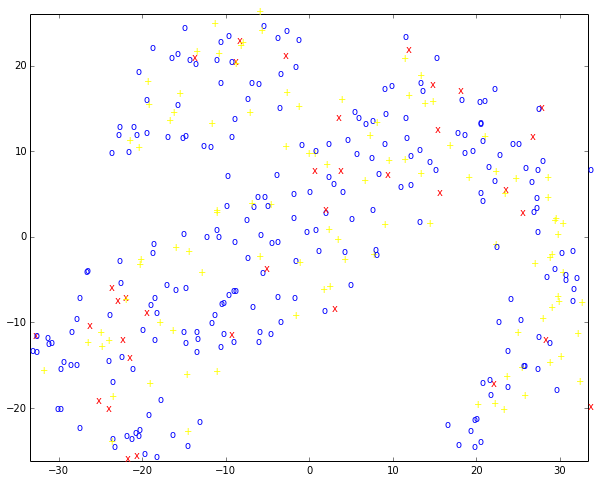

In [142]:
modelTSNE = TSNE(n_components=2, random_state=0)
X_2d = modelTSNE.fit_transform(X_test)
colors = ['blue', 'yellow', 'red']
signs = ['o', '+', 'x']
for i in range(len(y_test)):
    plt.text(X_2d[i,0], X_2d[i,1], signs[int(y[i])], color=colors[int(y[i])])

plt.xlim((np.min(X_2d[:,0]), np.max(X_2d[:,0])))
plt.ylim((np.min(X_2d[:,1]), np.max(X_2d[:,1])))

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()


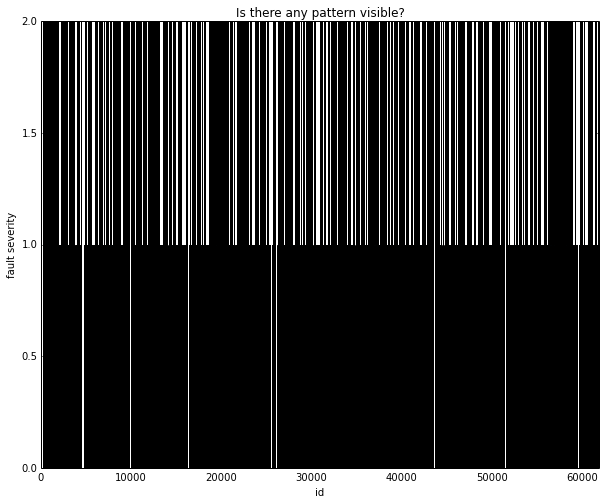

In [69]:
#Let's check if there is any overall temporal pattern visible (assuming that the ids are arranged over time)
count_data = result.fault_severity
result.fault_severity
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("id")
plt.ylabel("fault severity")
plt.title("Is there any pattern visible?")
plt.xlim(0, n_count_data)
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()

In [32]:
#quick existing model test
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

nb_classes = 3
batch_size = 128
nb_epoch = 20

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()
model.add(Dense(512, input_shape=(1325,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms)

model.fit(X_train, Y_train,
          batch_size=batch_size, nb_epoch=nb_epoch,
          show_accuracy=True, verbose=2,
          validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test,
                       show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

(58747, 'train samples')
(3092, 'test samples')
Train on 58747 samples, validate on 3092 samples
Epoch 1/20
1s - loss: 0.9433 - acc: 0.5911 - val_loss: 0.9364 - val_acc: 0.5954
Epoch 2/20
1s - loss: 0.9398 - acc: 0.5916 - val_loss: 0.9350 - val_acc: 0.5954
Epoch 3/20
1s - loss: 0.9381 - acc: 0.5916 - val_loss: 0.9326 - val_acc: 0.5954
Epoch 4/20
1s - loss: 0.9276 - acc: 0.5916 - val_loss: 0.9093 - val_acc: 0.5954
Epoch 5/20
1s - loss: 0.8722 - acc: 0.5914 - val_loss: 0.8334 - val_acc: 0.5954
Epoch 6/20
1s - loss: 0.8330 - acc: 0.5880 - val_loss: 0.8129 - val_acc: 0.5954
Epoch 7/20
1s - loss: 0.8209 - acc: 0.5905 - val_loss: 0.8304 - val_acc: 0.5954
Epoch 8/20
1s - loss: 0.8131 - acc: 0.5902 - val_loss: 0.7940 - val_acc: 0.5899
Epoch 9/20
1s - loss: 0.8044 - acc: 0.5926 - val_loss: 0.7831 - val_acc: 0.5993
Epoch 10/20
1s - loss: 0.7933 - acc: 0.6019 - val_loss: 0.7742 - val_acc: 0.6138
Epoch 11/20
1s - loss: 0.7828 - acc: 0.6109 - val_loss: 0.7596 - val_acc: 0.6358
Epoch 12/20
1s - loss

Using gpu device 0: GeForce GTX 980 (CNMeM is disabled)
